# Table of Content

### 1. Sample Data
### 2. Data Augmention - Synthetic data generation
### 3. Plots for Original and Augmented data
### 4. Data Preprocessing
### 5. Multivariate Anomaly Detection




## 1. Sample Data

We have observations on 9 variables

In [3]:
!pip install sesd
!pip install tsaug

  Created wheel for sesd: filename=sesd-0.2-py3-none-any.whl size=4711 sha256=545767e397988e3a97c111bc4516b9139d0c870ab27a3e7f94b426e3ddb92dc4
  Stored in directory: /home/jupyter/.cache/pip/wheels/8b/a1/14/6894ba655341cdb775fccfec9e992ebd606de44566fe6af906
Successfully built sesd


In [4]:
!pip install scipy

In [4]:
import numpy as np
import pandas as pd
import sesd
import matplotlib.dates as md
from matplotlib import pyplot as plt
import tsaug
from tsaug.visualization import plot
import math
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

In [3]:
ts_data = pd.read_csv("Fig8.csv")
ts_data = ts_data[['angle', 'current', 'fkm4tate', 'level',
       'load', 'pressure', 'temperature', 'waterFraction ',"label"]];ts_data.head()

,angle,current,fkm4tate,level,load,pressure,temperature,waterFraction,label
0,0.02,0.74,89933,-580,292,212.05,2.63,52.42,n
1,0.01,0.71,249557,-1020,1297,78.05,7.76,47.31,n
2,0.01,1.45,194271,-1462,2918,498.89,0.97,59.37,n
3,0.00,1.34,150168,-1334,2354,473.15,5.04,25.83,n
4,0.02,0.90,210809,-666,2988,141.65,2.80,21.95,n


## 2. Data Augmention - Synthetic data generation

# TimeSeries Augmentation

Given the lack of relevant data, we have decided to generate synthetic data, which would have somewhat similar properties as the original data. To achieve this, we are using below augmentation techniques,

### Time Warping:-

This augmenter random changed the speed of timeline. The time warping is controlled by the number of speed changes and the maximal ratio of max/min speed.

### Time Drifting:- 

The augmenter drifts the value of time series from its original values randomly and smoothly. The extent of drifting is controlled by the maximal drift and the number of drift points.

### Creating new samples by implementing above discussed techniques

In [50]:
angle = ts_data["angle"].values
current = ts_data["current"].values
fkm4tate = ts_data["fkm4tate"].values
level = ts_data["level"].values
load = ts_data["load"].values
pressure = ts_data["pressure"].values
temperature =  ts_data["temperature"].values
waterFraction = ts_data["waterFraction "].values

angle_list =[]
current_list =[]
fkm4tate_list=[]
level_list=[]
load_list = []
pressure_list = []
temp_list = []
waterFraction_list = []
for i in range(1,20):
   
    randInt =int(np.random.randint(min(range(1,9)),max(range(1,9)),1)[0])
    
    current_aug, angle_aug= tsaug.TimeWarp(n_speed_change=randInt, max_speed_ratio=3).augment(current,angle)
    current_aug, angle_aug  = tsaug.Drift(max_drift=0.7, n_drift_points=randInt).augment(current_aug, angle_aug )
    
    level_aug,fkm4tate_aug= tsaug.TimeWarp(n_speed_change=randInt, max_speed_ratio=3).augment(level,fkm4tate)
    level_aug,fkm4tate_aug  = tsaug.Drift(max_drift=0.7, n_drift_points=randInt).augment(level_aug,fkm4tate_aug) 
    
    pressure_aug,load_aug = tsaug.TimeWarp(n_speed_change=randInt, max_speed_ratio=3).augment(pressure,load)
    pressure_aug,load_aug  = tsaug.Drift(max_drift=0.7, n_drift_points=randInt).augment(pressure_aug,load_aug )
    
    temperature_aug,waterFraction_aug = tsaug.TimeWarp(n_speed_change=randInt, max_speed_ratio=3).augment(temperature,waterFraction)
    temperature_aug,waterFraction_aug  = tsaug.Drift(max_drift=0.7, n_drift_points=randInt).augment(temperature_aug,waterFraction_aug )
    
    angle_list =angle_list + list (angle_aug)
    current_list =current_list + list (current_aug)
    fkm4tate_list=fkm4tate_list + list (fkm4tate_aug)
    level_list=level_list + list (level_aug)
    load_list = load_list + list (load_aug)
    pressure_list = pressure_list + list (pressure_aug)
    temp_list =temp_list + list (temperature_aug)
    waterFraction_list = waterFraction_list + list (waterFraction_aug)
    

## 3. Plots for Original and Augmented data

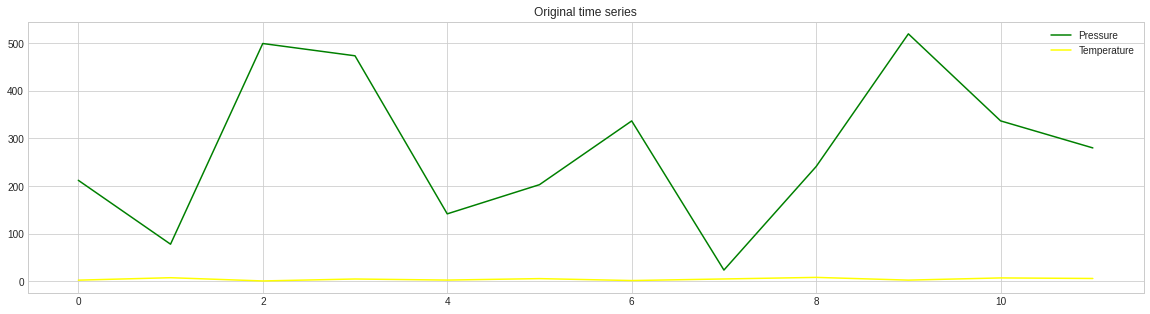

In [51]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(pressure, color= "green")
plt.plot(temperature,color= "yellow")
plt.title("Original time series")
plt.legend(["Pressure","Temperature"])
plt.show()

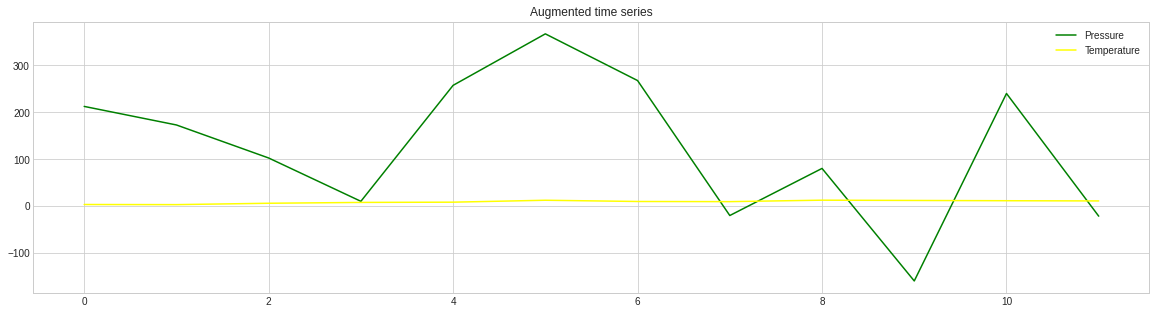

In [52]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(pressure_list[:12],color= "green")
plt.plot(temp_list[:12], color= "yellow")
plt.title("Augmented time series")
plt.legend(["Pressure","Temperature"])
plt.show()

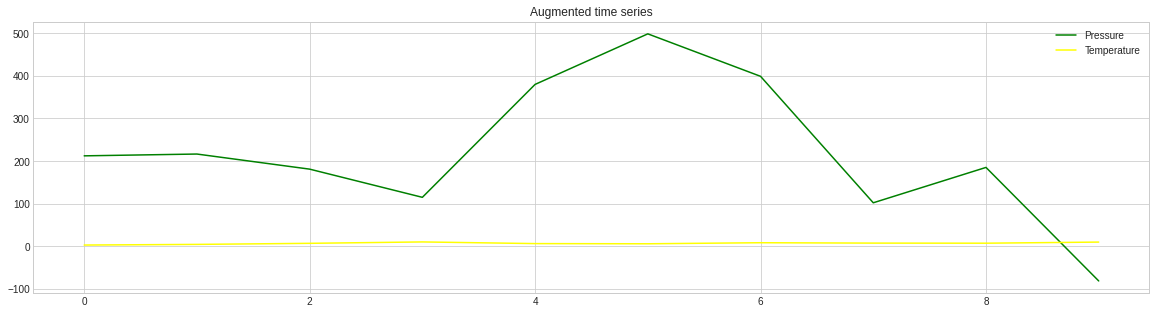

In [53]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(pressure_list[12:22],color= "green")
plt.plot(temp_list[12:22], color= "yellow")
plt.title("Augmented time series")
plt.legend(["Pressure","Temperature"])
plt.show()

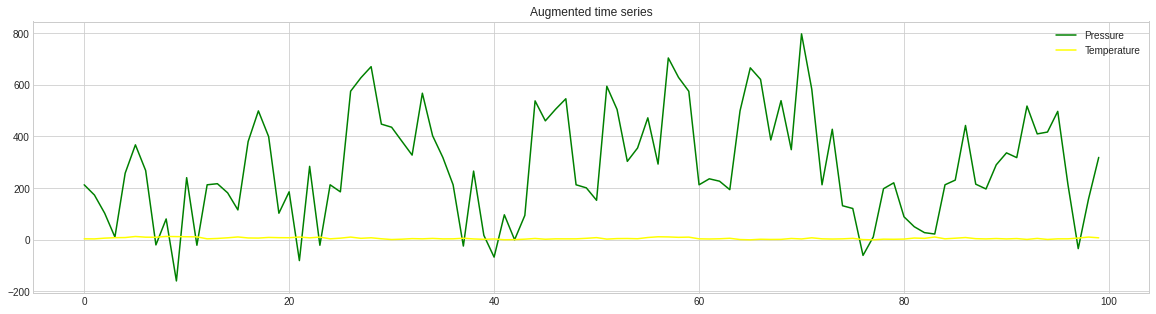

In [54]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(pressure_list[:100],color= "green")
plt.plot(temp_list[:100], color= "yellow")
plt.title("Augmented time series")
plt.legend(["Pressure","Temperature"])
plt.show()

In [55]:
final_data = pd.DataFrame()
final_data["angle"] = angle_list
final_data["current"] = current_list
final_data["fkm4tate"] = fkm4tate_list
final_data["level"] = level_list
final_data["load"]= load_list
final_data["pressure"] = pressure_list
final_data["temperature"]  =temp_list
final_data["waterFraction"] = waterFraction_list

## 4. Data Preprocessing

### median filter

The median filter is a nonlinear digital filtering technique, often used to remove noise. Such noise reduction is a typical pre-processing step to improve the results of later processing, in our case anomaly detection algorthims. 

In [56]:
final_data["smoothed_temperature"] = sp.signal.medfilt(final_data.temperature,13)
final_data["smoothed_pressure"] = sp.signal.medfilt(final_data.pressure,13)
final_data["smoothed_waterFraction"] = sp.signal.medfilt(final_data.waterFraction,13)

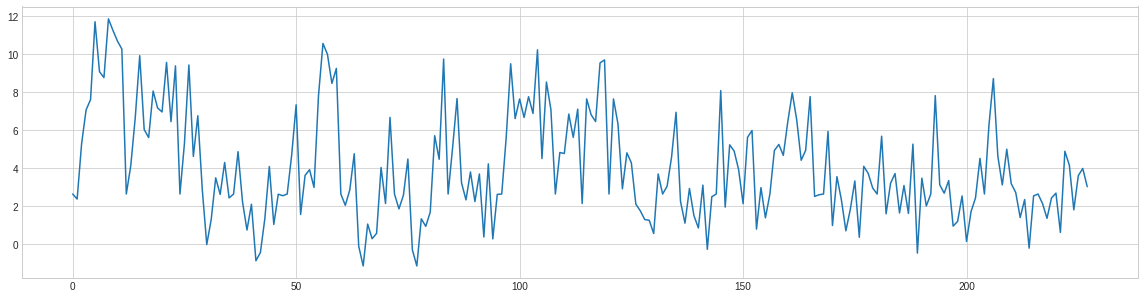

In [57]:
final_data["temperature"].plot()
plt.show()

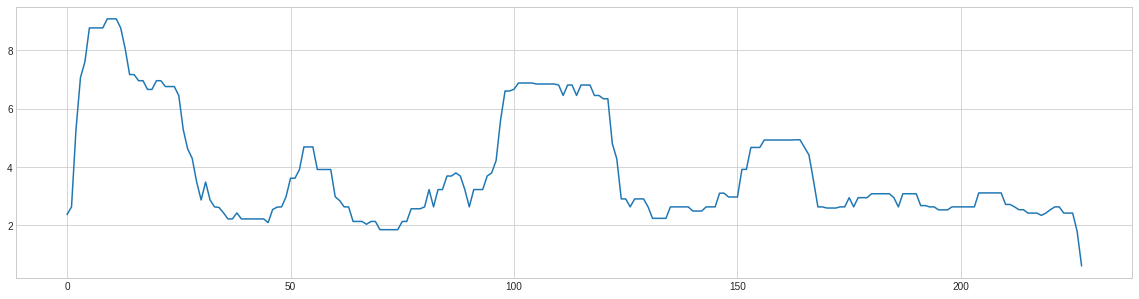

In [58]:
final_data["smoothed_temperature"].plot()
plt.show()

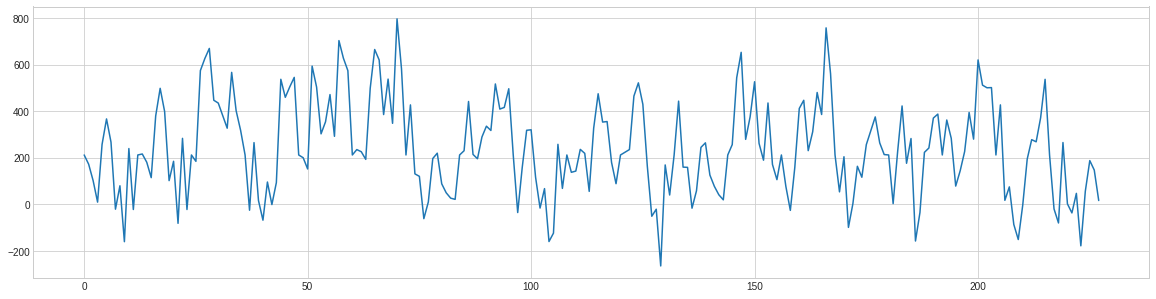

In [59]:
final_data["pressure"].plot()
plt.show()

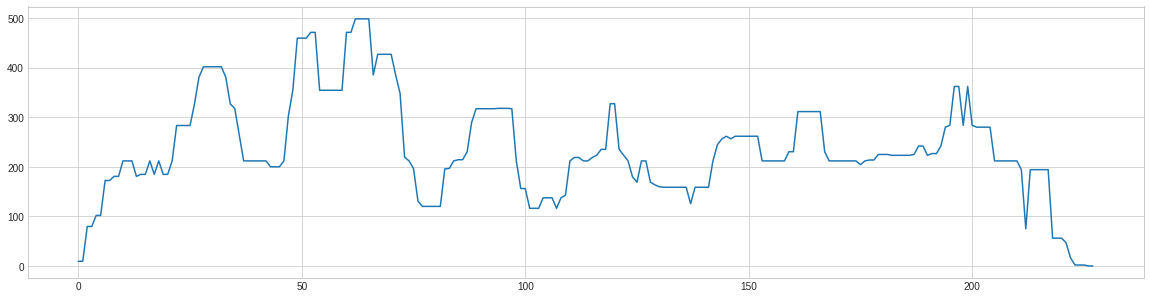

In [60]:
final_data["smoothed_pressure"].plot()
plt.show()

## 5. Multivariate Anomaly Detection

## Isolation Forest

Isolation forest is based on the following principles (according to Liu et al.); outliers are the minority and have abnormal behaviour on variables, compared to normal cases. Therefore, given a decision tree whose sole purpose is to identify a certain data point, less dataset splits should be required for isolating an outlier, than for isolating a common data point


In [75]:
processed_data = final_data[['smoothed_temperature','smoothed_pressure', 'smoothed_waterFraction']]
processed_data['date'] = pd.date_range(start='1/1/2010', periods=len(processed_data), freq='D')
processed_data.set_index("date",inplace=True)
processed_data.head(2)

,smoothed_temperature,smoothed_pressure,smoothed_waterFraction
date,,,
2010-01-01,2.365927,9.450231,23.0
2010-01-02,2.630000,9.450231,37.0


In [76]:
from sklearn.ensemble import IsolationForest

#apply an Isolation forest

outlier_detect = IsolationForest(n_estimators=1000, max_samples=1000, contamination=.04, max_features=processed_data.shape[1])
outlier_detect.fit(processed_data)
outliers_predicted = outlier_detect.predict(processed_data)

In [77]:
# saving
import pickle
with open('./DL-RNN/model.pickle', 'wb') as handle:
    pickle.dump(outlier_detect, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [78]:
# loading
with open('./DL-RNN/model.pickle', 'rb') as handle:
    model = pickle.load(handle)

In [79]:
processed_data.head()

,smoothed_temperature,smoothed_pressure,smoothed_waterFraction
date,,,
2010-01-01,2.365927,9.450231,23.0
2010-01-02,2.630000,9.450231,37.0
2010-01-03,5.286462,79.673257,48.0
2010-01-04,7.063961,79.673257,52.0
2010-01-05,7.609125,101.932693,52.0


In [80]:
outliers_predicted = model.predict(processed_data)

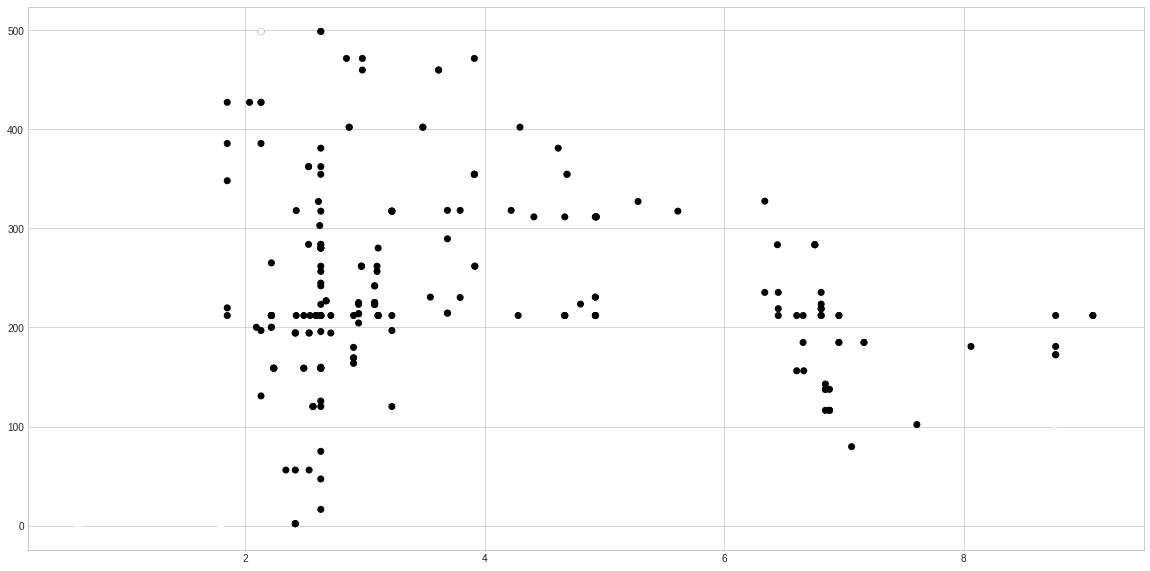

In [81]:
#check the results
processed_data['outlier'] = outliers_predicted
plt.figure(figsize = (20,10))
plt.scatter(processed_data['smoothed_temperature'], processed_data['smoothed_pressure'], c=processed_data['outlier'])
plt.show()

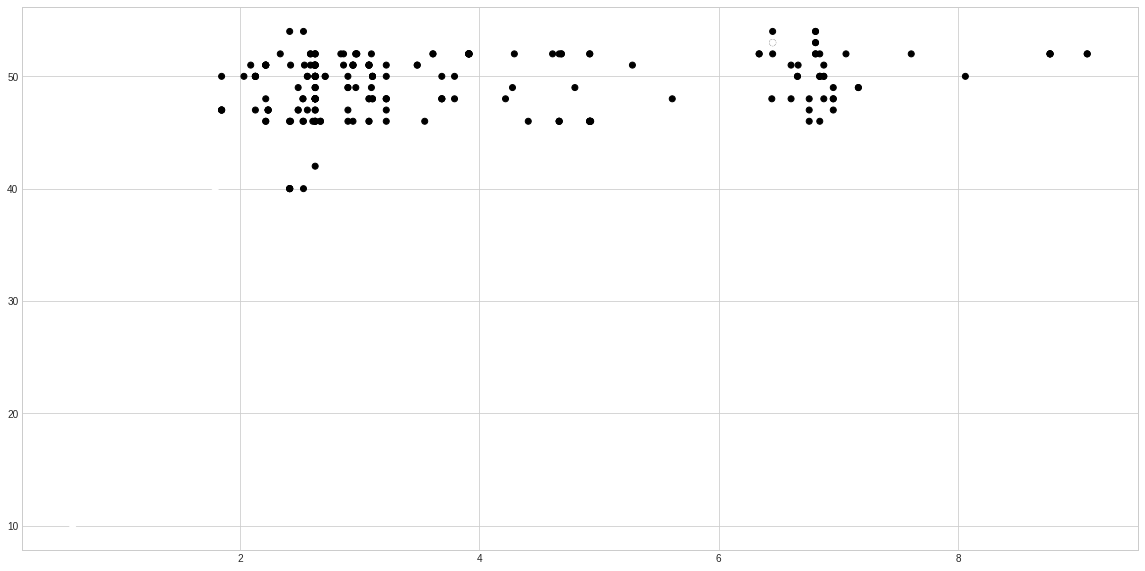

In [82]:
#check the results
processed_data['outlier'] = outliers_predicted
plt.figure(figsize = (20,10))
plt.scatter(processed_data['smoothed_temperature'], processed_data['smoothed_waterFraction'], c=processed_data['outlier'])
plt.show()

In [87]:
processed_data['outlier'].value_counts()

 1    218
-1     10
Name: outlier, dtype: int64

In [83]:
newDict = {-1: True,1:False}
anomalies= processed_data.outlier.map(newDict)
processed_data.head()

,smoothed_temperature,smoothed_pressure,smoothed_waterFraction,outlier
date,,,,
2010-01-01,2.365927,9.450231,23.0,-1
2010-01-02,2.630000,9.450231,37.0,-1
2010-01-03,5.286462,79.673257,48.0,-1
2010-01-04,7.063961,79.673257,52.0,1
2010-01-05,7.609125,101.932693,52.0,1


### MinClusterDetector

MinClusterDetector treats multivariate time series as independent points in a high-dimensional space, divides them into clusters, and identifies values in the smallest cluster as anomalous. This may help capturing outliers in high-dimensional space.

In [35]:
from adtk.detector import MinClusterDetector
from sklearn.cluster import KMeans
from adtk.visualization import plot
from adtk.data import validate_series

processed_data = final_data[['smoothed_temperature','smoothed_pressure', 'smoothed_waterFraction']]
processed_data['date'] = pd.date_range(start='1/1/2010', periods=len(processed_data), freq='D')
processed_data.set_index("date",inplace=True)
processed_data = validate_series(processed_data)
processed_data.head(2)


,smoothed_temperature,smoothed_pressure,smoothed_waterFraction
date,,,
2010-01-01,0.214146,24.229338,33.0
2010-01-02,2.630000,211.687503,33.0


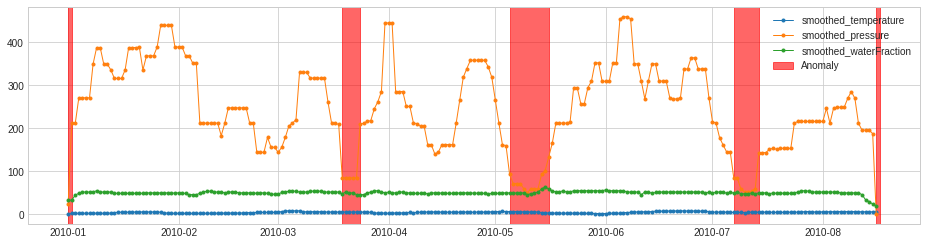

In [36]:
min_cluster_detector = MinClusterDetector(KMeans(n_clusters=4))
anomalies = min_cluster_detector.fit_detect(processed_data)
plot(processed_data, anomaly=anomalies, ts_linewidth=1, ts_markersize=6,anomaly_markersize=6, anomaly_color='red', anomaly_alpha=0.6, curve_group='all');

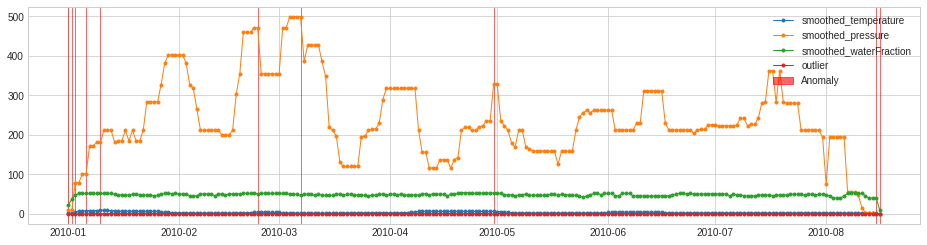

In [84]:
plot(processed_data, anomaly=anomalies, ts_linewidth=1, ts_markersize=6,anomaly_markersize=6, anomaly_color='red', anomaly_alpha=0.6, curve_group='all');

## OutlierDetector 

OutlierDetector performs multivariate time-independent outlier detection and identifies outliers as anomalies

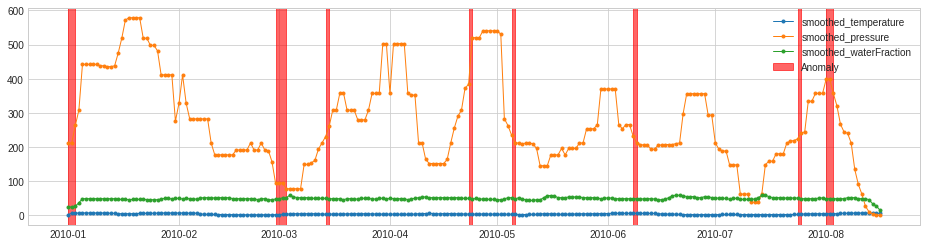

In [58]:
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.05))
anomalies = outlier_detector.fit_detect(processed_data)
plot(processed_data, anomaly=anomalies, ts_linewidth=1, ts_markersize=6, anomaly_color='red', anomaly_alpha=0.6, curve_group='all');

## RegressionAD 

RegressionAD detects anomalous violation of usual relationship between multivariate series by tracking regressive error

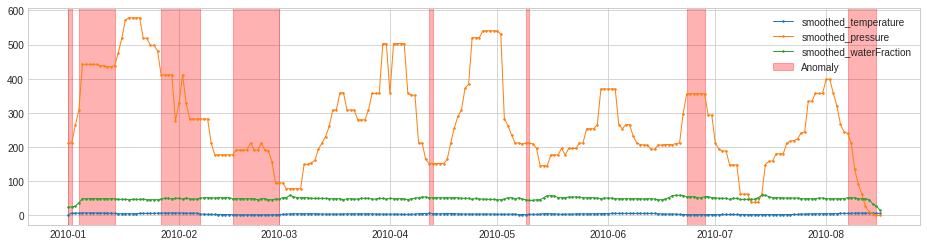

In [72]:
from adtk.detector import RegressionAD
from sklearn.linear_model import LinearRegression
regression_ad = RegressionAD(regressor=LinearRegression(), target="smoothed_temperature", c=.1)
anomalies = regression_ad.fit_detect(processed_data)
plot(processed_data, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

## Predicting for new data

In [90]:

pressure = ts_data["pressure"].values
temperature =  ts_data["temperature"].values
waterFraction = ts_data["waterFraction "].values


pressure_list = []
temp_list = []
waterFraction_list = []
for i in range(1,4):
   
    randInt =int(np.random.randint(min(range(1,9)),max(range(1,9)),1)[0])
    
    pressure_aug = tsaug.TimeWarp(n_speed_change=randInt, max_speed_ratio=3).augment(pressure)
    pressure_aug  = tsaug.Drift(max_drift=0.7, n_drift_points=randInt).augment(pressure_aug )
    
    temperature_aug,waterFraction_aug = tsaug.TimeWarp(n_speed_change=randInt, max_speed_ratio=3).augment(temperature,waterFraction)
    temperature_aug,waterFraction_aug  = tsaug.Drift(max_drift=0.7, n_drift_points=randInt).augment(temperature_aug,waterFraction_aug )
    
    pressure_list = pressure_list + list (pressure_aug)
    temp_list =temp_list + list (temperature_aug)
    waterFraction_list = waterFraction_list + list (waterFraction_aug)

new_data = pd.DataFrame()
new_data["smoothed_pressure"] = sp.signal.medfilt(pressure_list,13)
new_data["smoothed_temperature"]  =sp.signal.medfilt(temp_list,13)
new_data["smoothed_waterFraction"] = sp.signal.medfilt(waterFraction_list,13)
new_data['date'] = pd.date_range(start='1/1/2010', periods=len(new_data), freq='D')
new_data.set_index("date",inplace=True)
new_data = validate_series(new_data)

### No anomalies were seen in the new data 

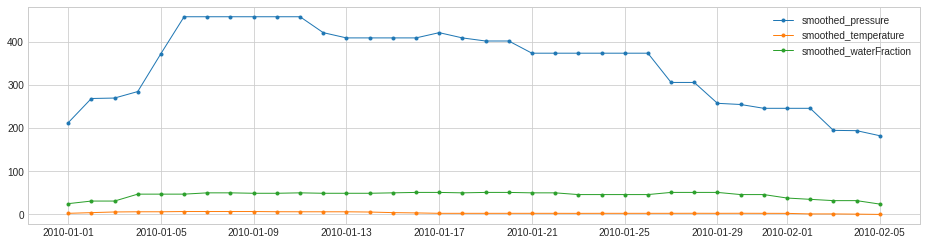

In [87]:
anomalies = min_cluster_detector.detect(new_data)
plot(new_data, anomaly=anomalies, ts_linewidth=1, ts_markersize=6,anomaly_markersize=6, anomaly_color='red', anomaly_alpha=0.6, curve_group='all');

### Anomalies were identified in the end of data 

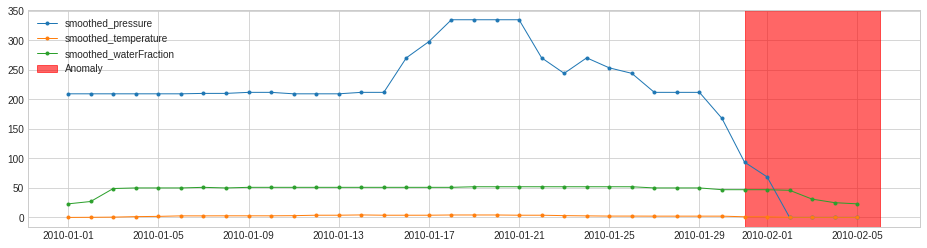

In [89]:
anomalies = min_cluster_detector.detect(new_data)
plot(new_data, anomaly=anomalies, ts_linewidth=1, ts_markersize=6,anomaly_markersize=6, anomaly_color='red', anomaly_alpha=0.6, curve_group='all');

### With anomalies in start, middle and end in the new data 

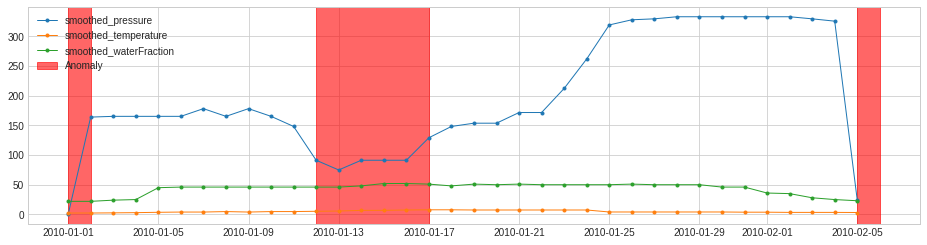

In [91]:
anomalies = min_cluster_detector.detect(new_data)
plot(new_data, anomaly=anomalies, ts_linewidth=1, ts_markersize=6,anomaly_markersize=6, anomaly_color='red', anomaly_alpha=0.6, curve_group='all');